In [1]:
import numpy as np
import analyze_michell_truss as amt

import json
import pandas as pd

import pathlib

In [2]:
import matplotlib.pyplot as plt

# Manual Composite Metric

In [123]:
# Load data.
data_folder = pathlib.Path("/Users/noah/harvard/2021/coursework_fall_2021/4450_COMPUTATIONAL_DESIGN/hw/4/data")
output_folder = pathlib.Path("/Users/noah/harvard/2021/coursework_fall_2021/4450_COMPUTATIONAL_DESIGN/hw/4/figures")



data_file = data_folder.joinpath("manual_optimization_data.xlsx")

df = pd.read_excel(data_file)
df = df.set_index("Unnamed: 0")

In [135]:
df.index.name = 'experiment'

In [136]:
df

weight_structural_weight  weight_unshaded_area  \
experiment                                                   
0.0                              1.0                   0.0   
1.0                              0.0                   1.0   
2.0                              0.0                   0.0   
3.0                              1.0                   1.0   
4.0                              1.0                   0.0   
5.0                              0.0                   1.0   
6.0                              1.0                   1.0   
7.0                              1.0                   0.5   
8.0                              0.5                   1.0   
9.0                              0.5                   0.5   

            weight_num_elements  x_1_lower_support_height  x_2_canopy_tip_x  \
experiment                                                                    
0.0                         0.0                     7.896             10.00   
1.0                         0.0                    11.500             20.00   
2.0                         1.0                    12.920             10.54   
3.0                         0.0                     6.000             20.00   
4.0                         1.0                     6.000             10.00   
5.0                         1.0                     6.250             20.00   
6.0                         1.0                     6.000             20.00   
7.0                         0.5                     6.000             16.89   
8.0                         0.5                     6.000             20.00   
9.0                         1.0                     6.000             19.63   

            x_3_canopy_tip_z  x_4_support_cable_count  \
experiment                                              
0.0                   12.253                     20.0   
1.0                    6.000                     19.0   
2.0                   10.770                      2.0   
3.0                    6.000                     20.0   
4.0                    7.120                      2.0   
5.0                    6.000                      2.0   
6.0                    6.000                      2.0   
7.0                    6.000                      3.0   
8.0                    6.010                      3.0   
9.0                    6.000                      2.0   

            metric_structural_weight  metric_unshaded  metric_num_elements  \
experiment                                                                   
0.0                           0.0107            0.854                1.000   
1.0                           0.2770            0.173                0.952   
2.0                           0.0980            0.784                0.143   
3.0                           0.1120            0.173                1.000   
4.0                           0.0280            0.800                0.143   
5.0                           0.3070            0.173                0.143   
6.0                           0.2240            0.173                0.190   
7.0                           0.1250            0.329                0.190   
8.0                           0.2240            0.173                0.190   
9.0                           0.2800            0.191                0.143   

            composite_metric  
experiment                    
0.0                   1.8647  
1.0                   0.1730  
2.0                   0.1430  
3.0                   0.2960  
4.0                   0.1710  
5.0                   0.3160  
6.0                   0.5880  
7.0                   0.3850  
8.0                   0.3810  
9.0                   0.3790

In [146]:
df_export = df.rename({
    'weight_structural_weight':'w_1',
    'weight_unshaded_area':'w_2',
    'weight_num_elements':'w_3',
    'x_1_lower_support_height':'x_1',
    'x_2_canopy_tip_x':'x_2',
    'x_3_canopy_tip_z':'x_3',
    'x_4_support_cable_count':'x_4',
    'metric_structural_weight':'J_1',
    'metric_unshaded':'J_2',
    'metric_num_elements':'J_3',
    'composite_metric':'composite_metric',
}, axis=1)

In [157]:
print(df_export.drop(["w_1","w_2","w_3"], axis=1).to_latex())

\begin{tabular}{lrrrrrrrr}
\toprule
{} &     x\_1 &    x\_2 &     x\_3 &   x\_4 &     J\_1 &    J\_2 &    J\_3 &  composite\_metric \\
experiment &         &        &         &       &         &        &        &                   \\
\midrule
0.0        &   7.896 &  10.00 &  12.253 &  20.0 &  0.0107 &  0.854 &  1.000 &            1.8647 \\
1.0        &  11.500 &  20.00 &   6.000 &  19.0 &  0.2770 &  0.173 &  0.952 &            0.1730 \\
2.0        &  12.920 &  10.54 &  10.770 &   2.0 &  0.0980 &  0.784 &  0.143 &            0.1430 \\
3.0        &   6.000 &  20.00 &   6.000 &  20.0 &  0.1120 &  0.173 &  1.000 &            0.2960 \\
4.0        &   6.000 &  10.00 &   7.120 &   2.0 &  0.0280 &  0.800 &  0.143 &            0.1710 \\
5.0        &   6.250 &  20.00 &   6.000 &   2.0 &  0.3070 &  0.173 &  0.143 &            0.3160 \\
6.0        &   6.000 &  20.00 &   6.000 &   2.0 &  0.2240 &  0.173 &  0.190 &            0.5880 \\
7.0        &   6.000 &  16.89 &   6.000 &   3.0 &  0.1250 &  0.3

<IPython.core.display.Javascript object>


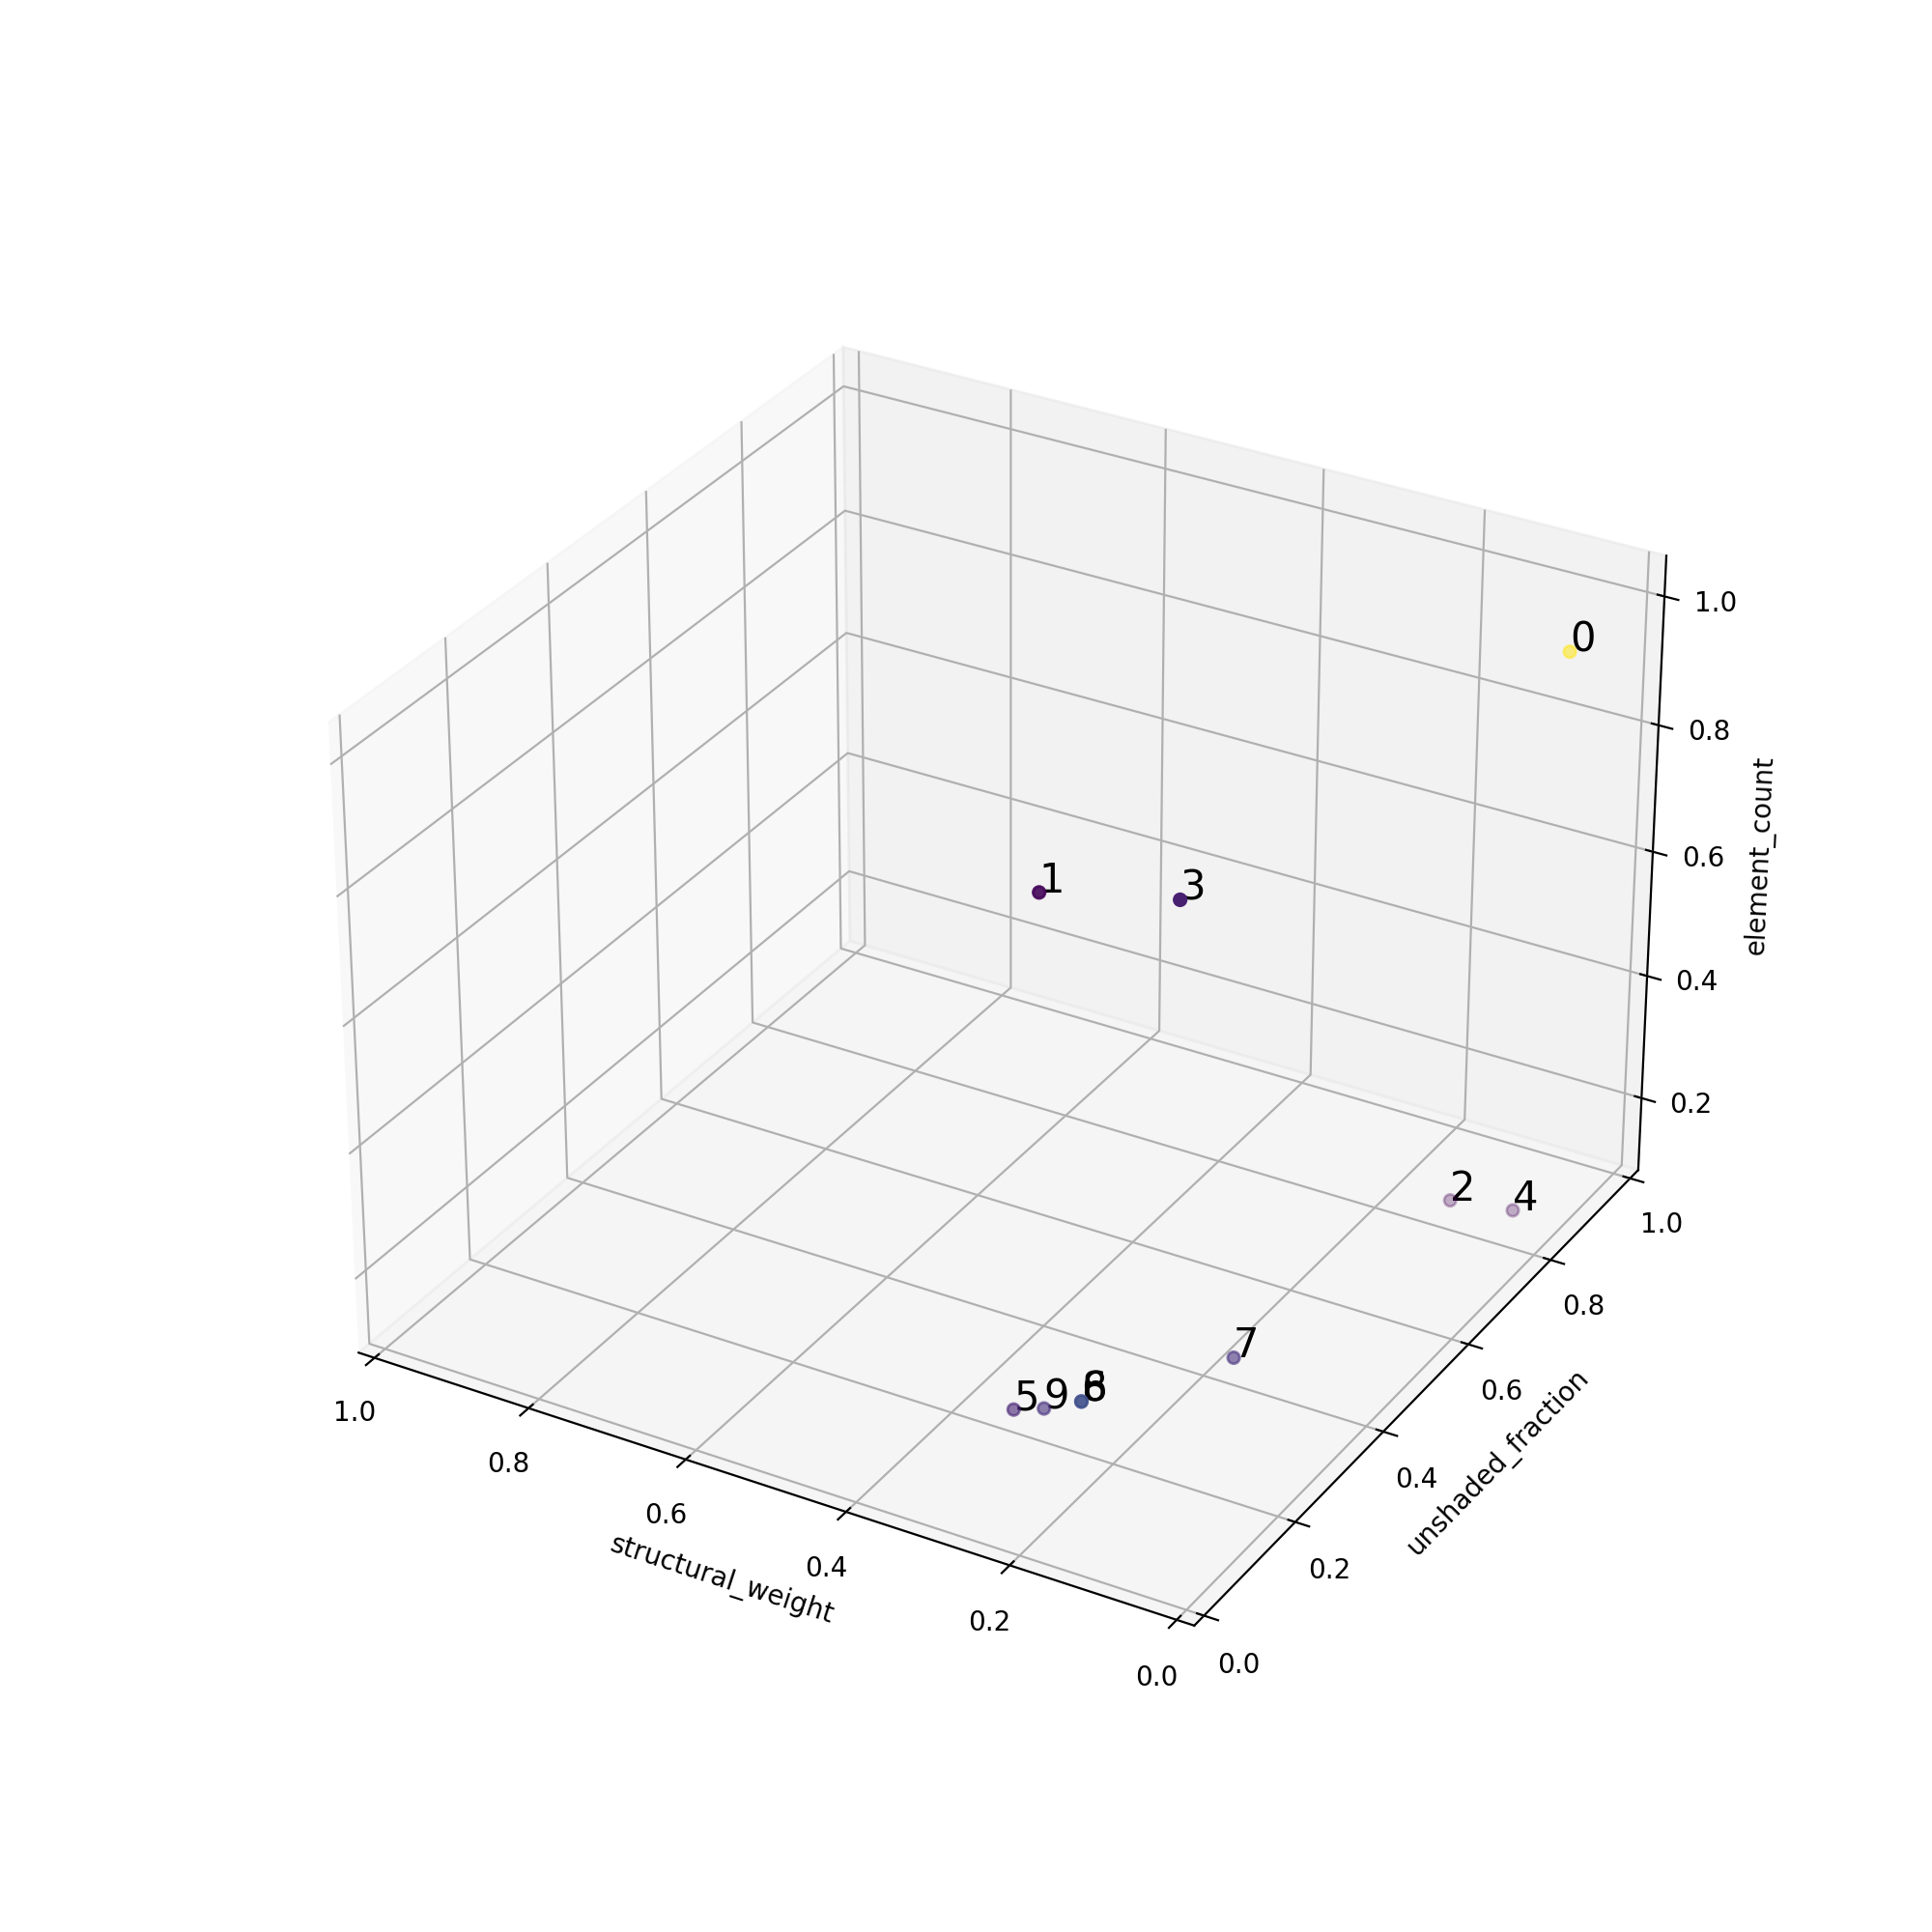

In [124]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = df['metric_structural_weight']
y = df['metric_unshaded']
z = df['metric_num_elements']

ax.set_xlabel("structural_weight")
ax.set_ylabel("unshaded_fraction")
ax.set_zlabel("element_count")

ax.scatter(x, y, z, c=df['composite_metric'])

ax.set_xlim(0,1.)
ax.set_ylim(0,1.)
ax.invert_xaxis()




for x_,y_,z_,l_ in zip(x,y,z,df.index):
    ax.text(x_,y_,z_, int(l_), size=15, zorder=1,color='k') 

plt.savefig(output_folder.joinpath("normalized_objective_overview.png"))

<IPython.core.display.Javascript object>


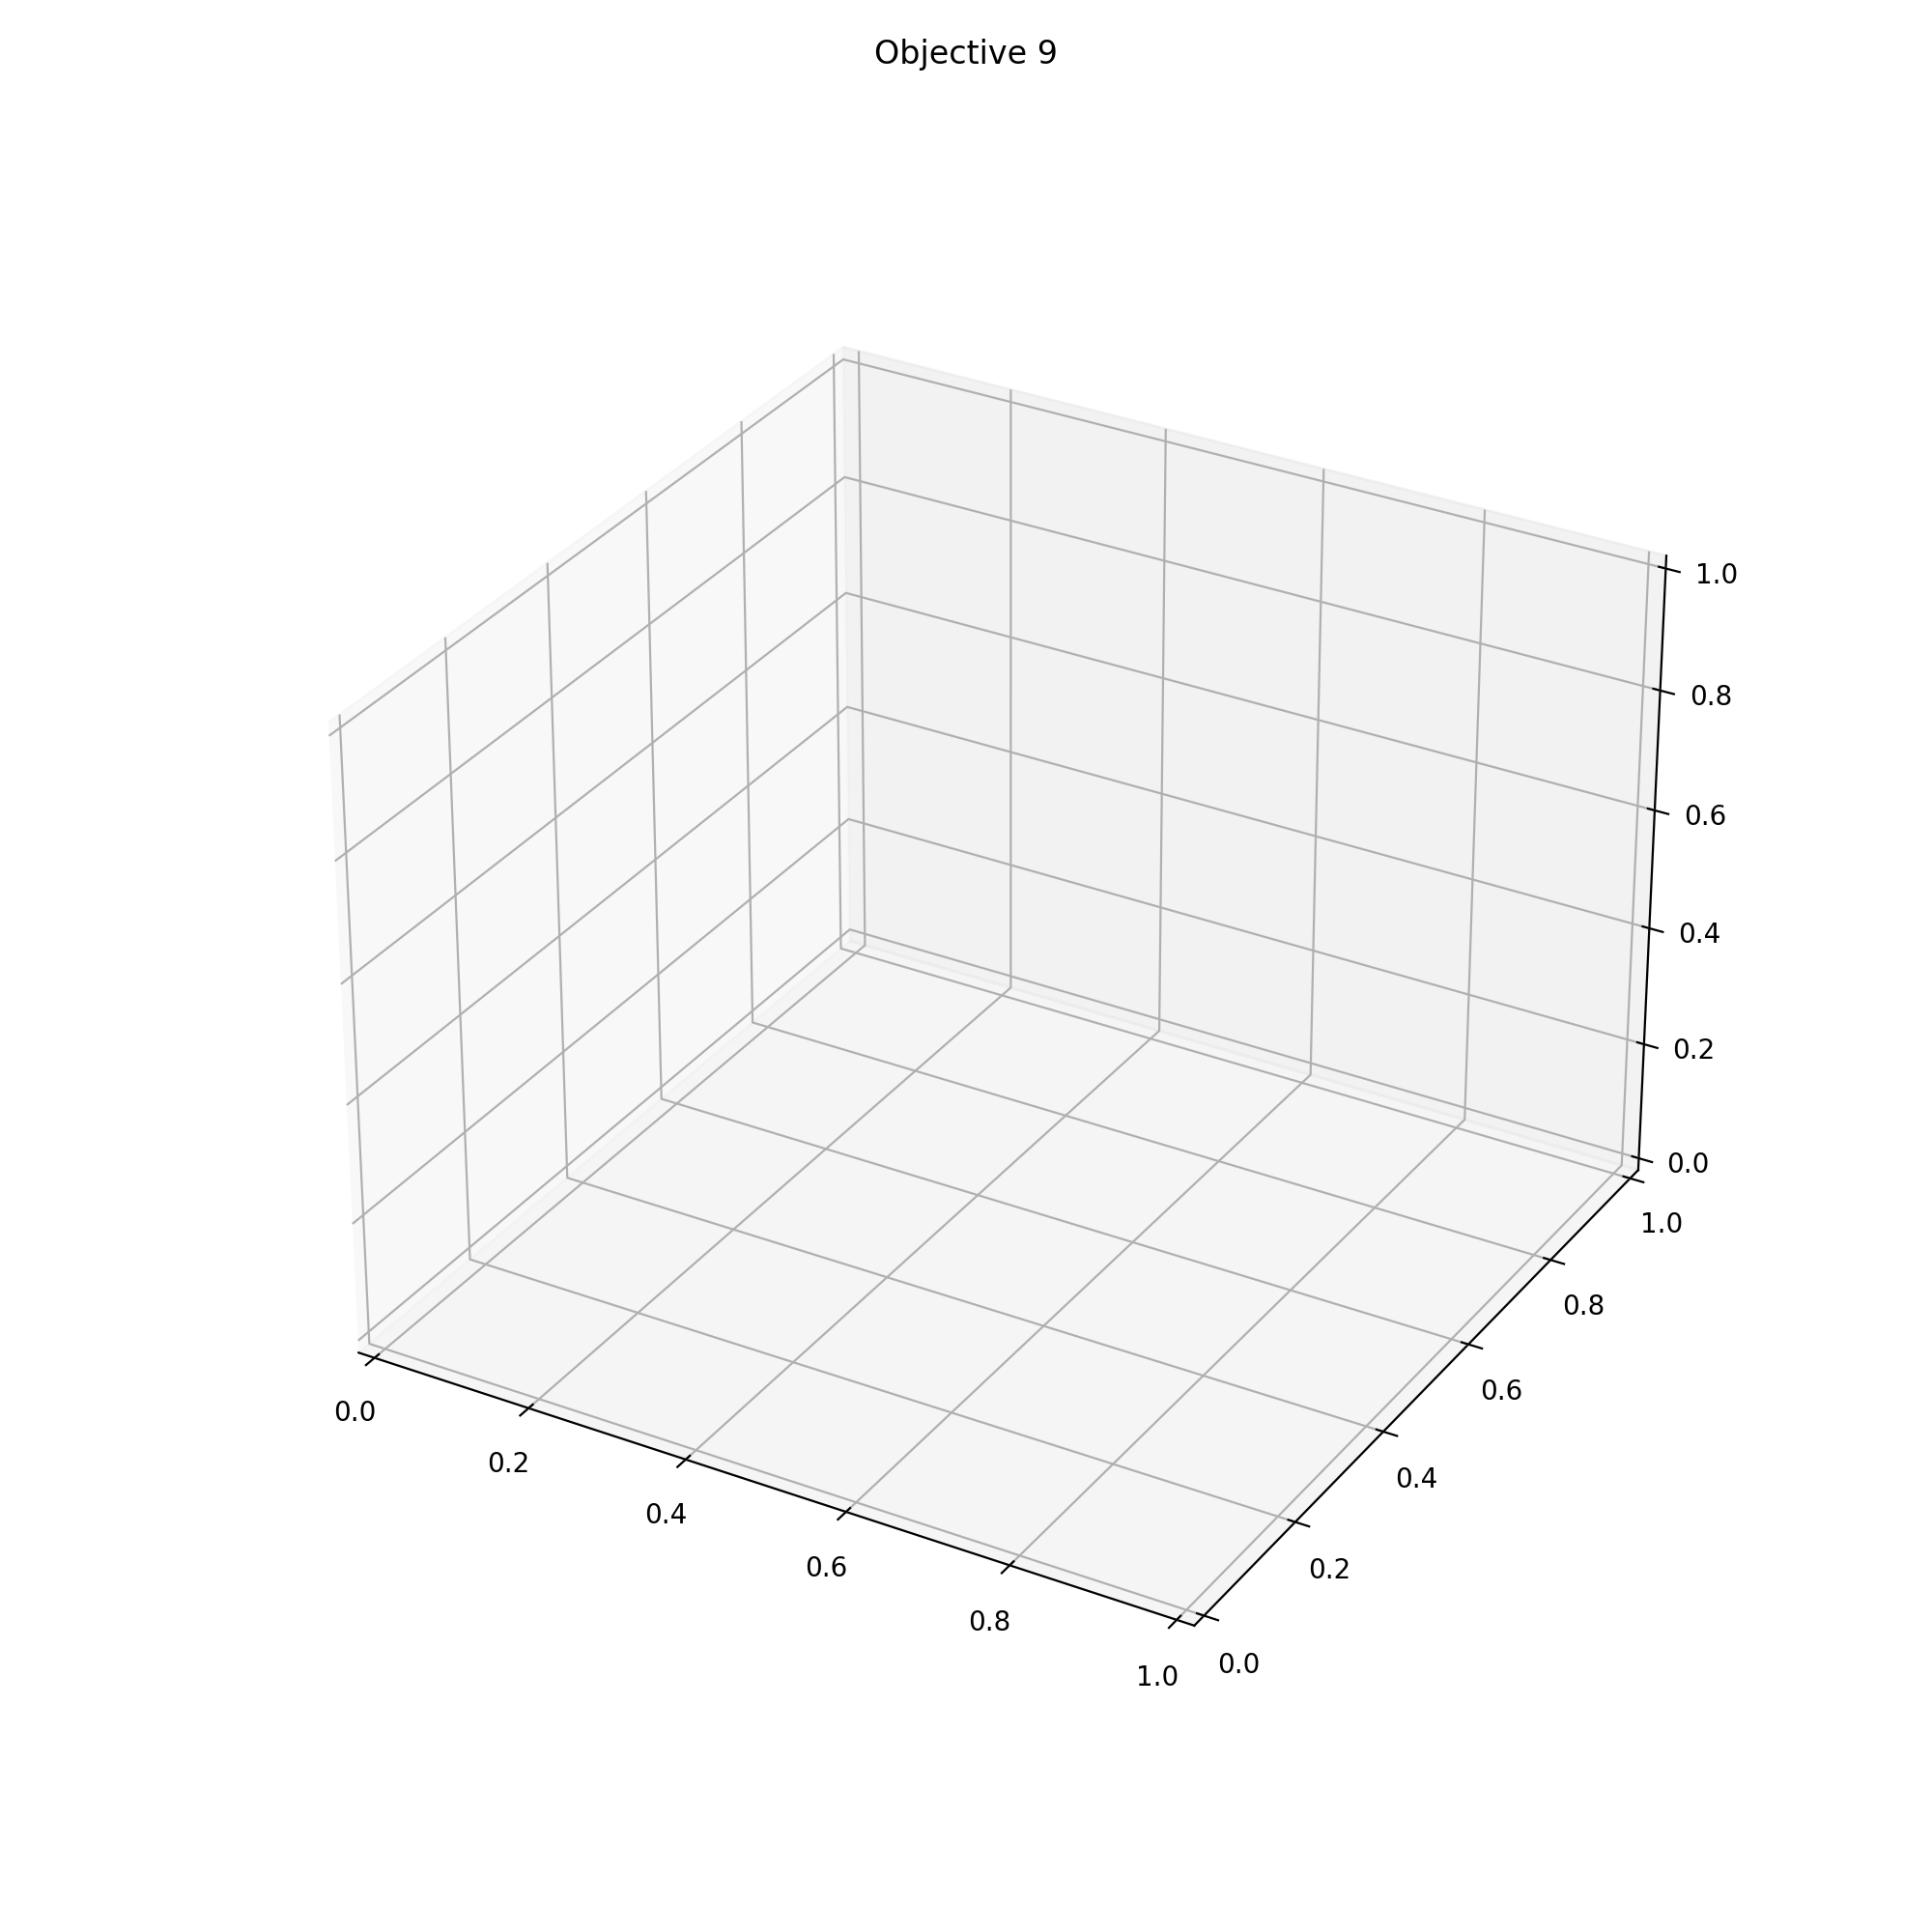

/var/folders/x5/vng012jd65x1gv_z8m2rw9900000gn/T/ipykernel_25657/1033312681.py:38: RuntimeWarning: divide by zero encountered in true_divide
  zz = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]


In [116]:
# Plot Isosurface.
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')


x = df['metric_structural_weight']
y = df['metric_unshaded']
z = df['metric_num_elements']




# create x,y
xx, yy = np.meshgrid(np.linspace(0,1,10), np.linspace(0,1,10))



for index, row in df.iterrows():
    
    ax.set_xlim(0,1.)
    ax.set_ylim(0,1.)
    ax.set_zlim(0,1.)
    ax.set_xlabel("structural_weight")
    ax.set_ylabel("unshaded_fraction")
    ax.set_zlabel("element_count")
    ax.invert_xaxis()

    
    i = int(index)
    w1 = row['weight_structural_weight']
    w2 = row['weight_unshaded_area']
    w3 = row['weight_num_elements']
    
    normal = np.array([w1,w2,w3])
    point = np.array([x[i], y[i], z[i]])
    d = -point.dot(normal)
    # calculate corresponding z
    zz = (-normal[0] * xx - normal[1] * yy - d) * 1. / normal[2]

    
    # Plot Points
    ax.scatter(x, y, z, c=df['composite_metric'])
    
    
    for x_,y_,z_,l_ in zip(x,y,z,df.index):
        ax.text(x_,y_,z_, int(l_), size=15, zorder=1,color='k') 
    
    # Plot plane.
    ax.plot_surface(xx, yy, zz, alpha=.5, color="orange")

    
    # Set title.
    fig.suptitle(f'Objective {i}')

    plt.savefig(output_folder.joinpath(f"normalized_objective_isosurface_{i}.png"))
    
    ax.clear()


In [117]:
x_m = x
y_m = y
z_m = z

# MOO

In [161]:
data_folder = pathlib.Path("/Users/noah/harvard/2021/coursework_fall_2021/4450_COMPUTATIONAL_DESIGN/hw/4/data")

data_file = data_folder.joinpath("allSolutions-moo-pareto.csv")


colnames = ['x1', 'x2', 'x3', 'x4', "metric_structural_weight", 'metric_unshaded_fraction', 'metric_element']
df = pd.read_csv(data_file, names=colnames, header=None)


In [162]:
df.shape

(1600, 7)

<IPython.core.display.Javascript object>


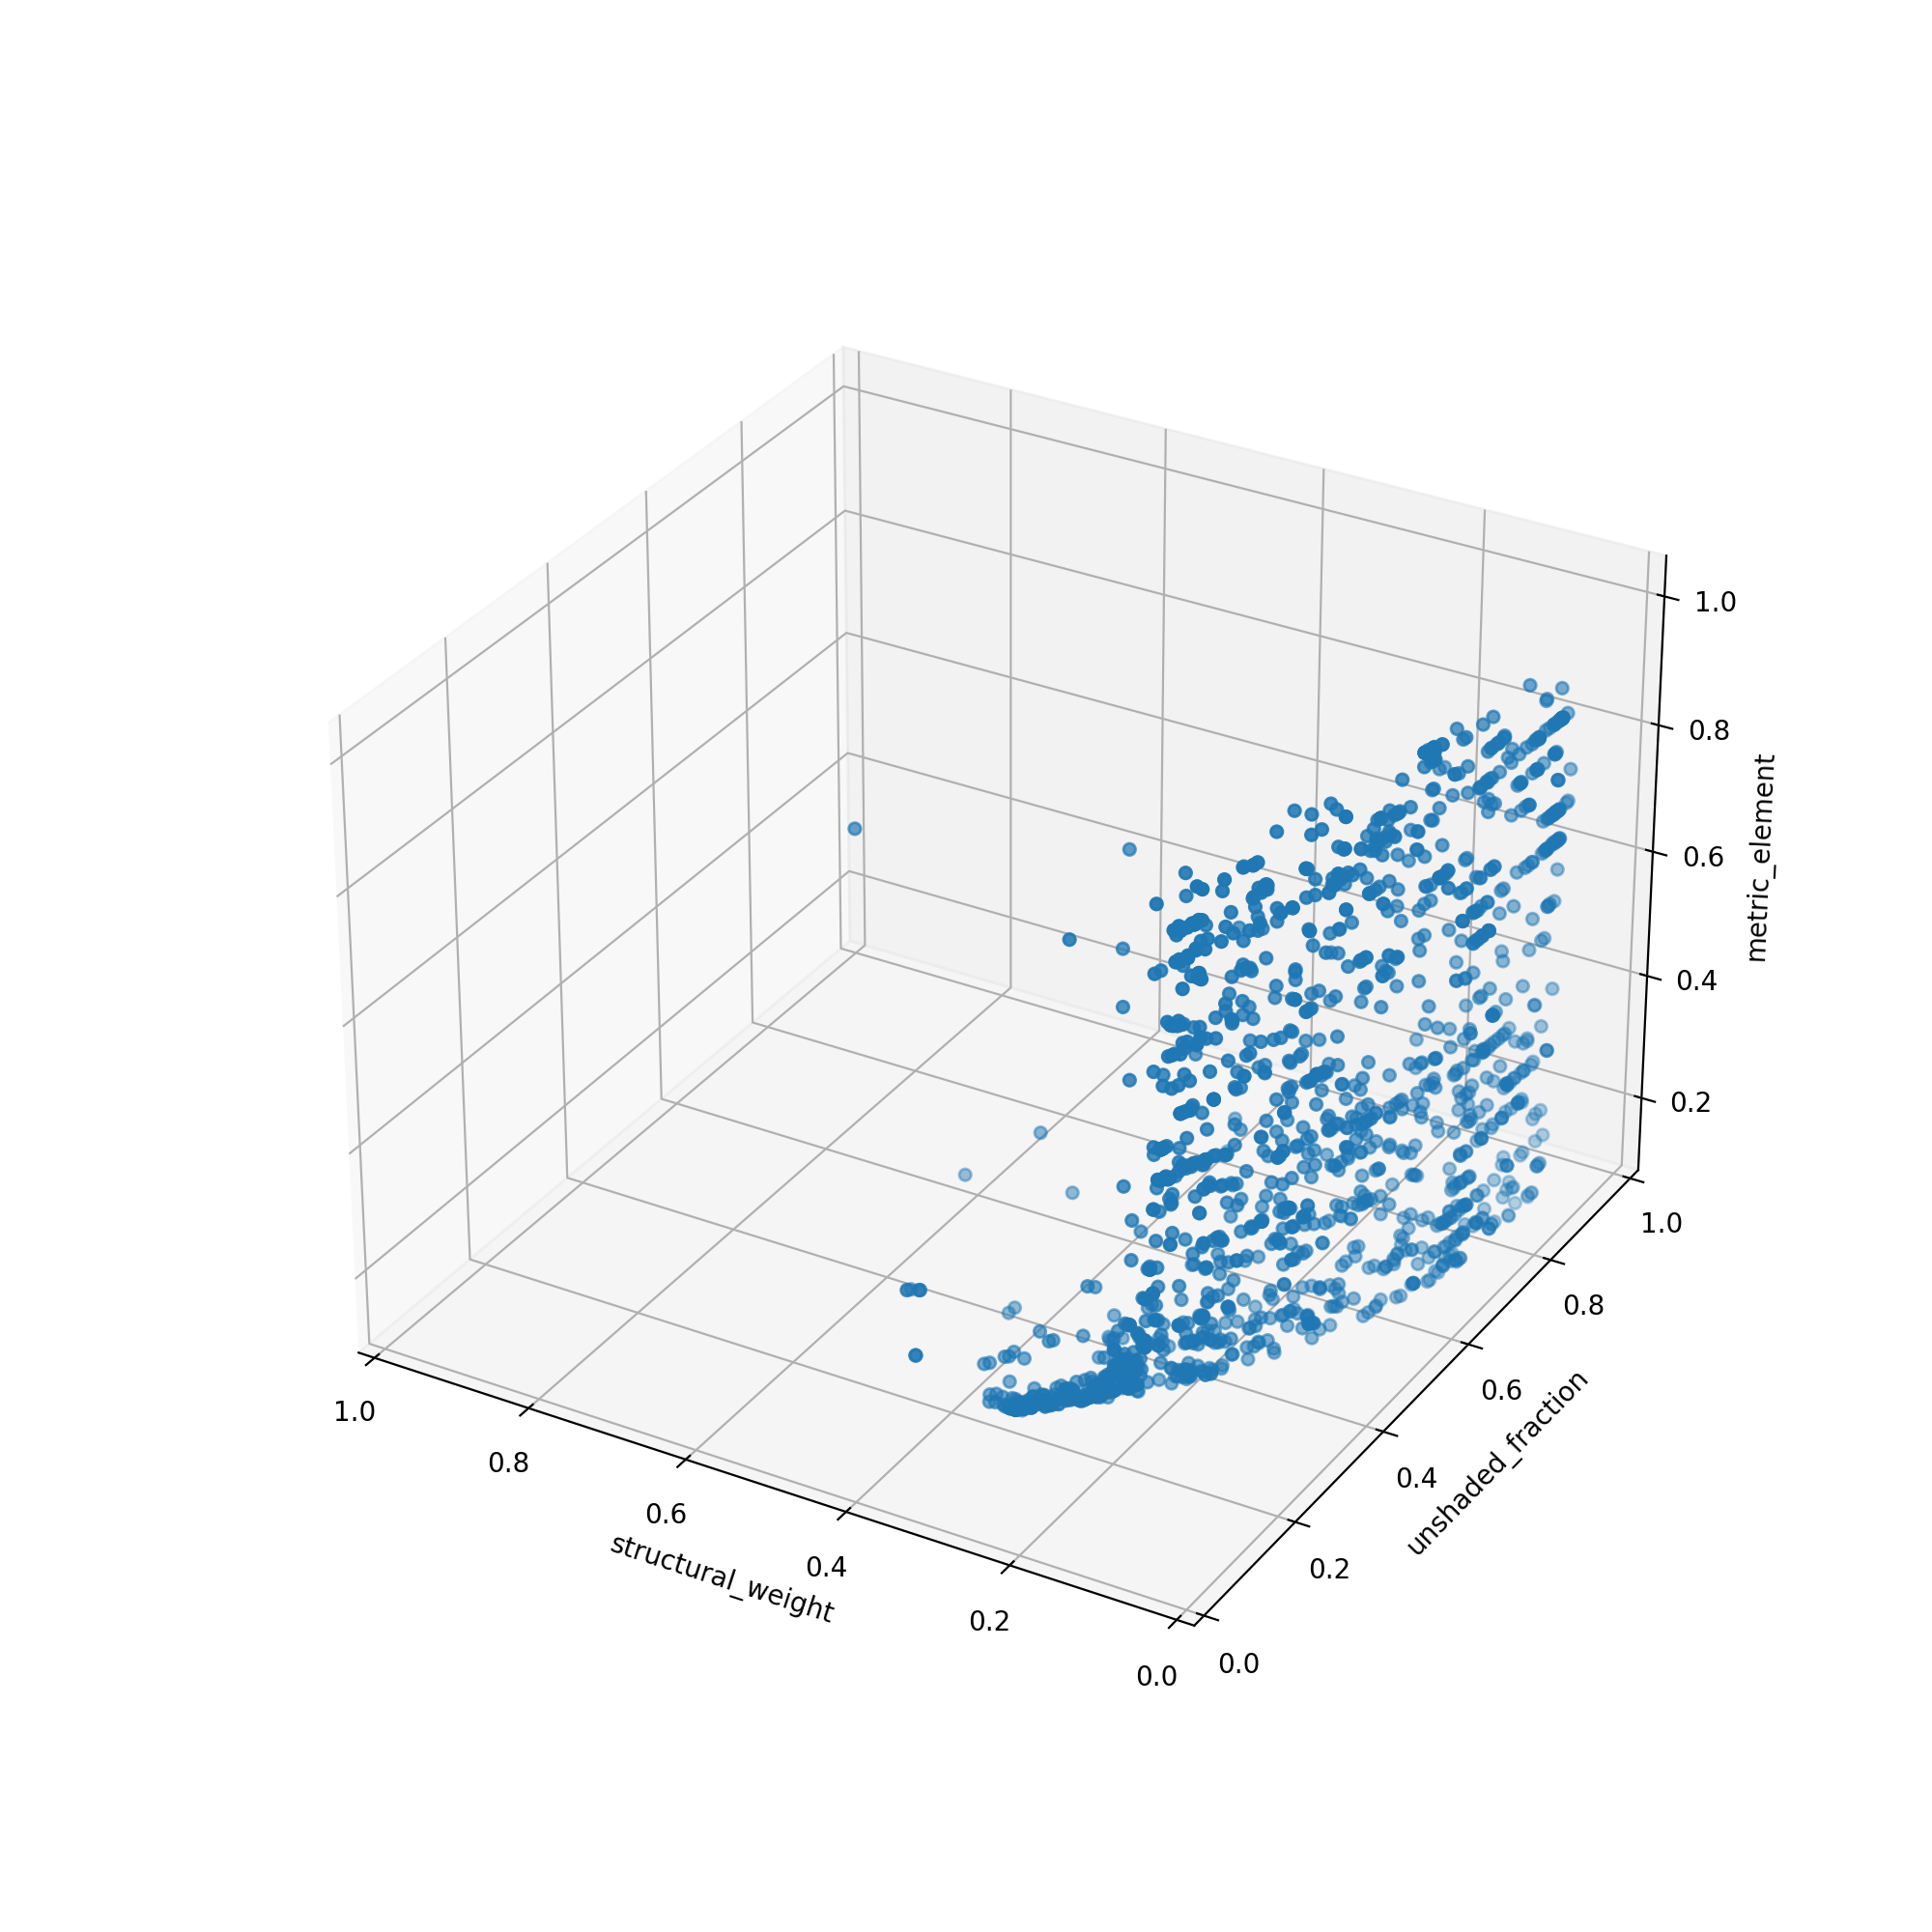

In [163]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = df['metric_structural_weight']
y = df['metric_unshaded_fraction']
z = df['metric_element']

ax.set_xlabel("structural_weight")
ax.set_ylabel("unshaded_fraction")
ax.set_zlabel("metric_element")

ax.scatter(x, y, z)

ax.set_xlim(0,1.)
ax.set_ylim(0,1.)
ax.invert_xaxis()



plt.savefig(output_folder.joinpath("moo_objective.png"))

In [164]:
# Find Pareto

def keep_efficient(pts):
    'returns Pareto efficient row subset of pts'
    # sort points by decreasing sum of coordinates
    pts = pts[pts.sum(1).argsort()[::-1]]
    # initialize a boolean mask for undominated points
    # to avoid creating copies each iteration
    undominated = np.ones(pts.shape[0], dtype=bool)
    for i in range(pts.shape[0]):
        # process each point in turn
        n = pts.shape[0]
        if i >= n:
            break
        # find all points not dominated by i
        # since points are sorted by coordinate sum
        # i cannot dominate any points in 1,...,i-1
        undominated[i+1:n] = (pts[i+1:] >= pts[i]).any(1) 
        # keep points undominated so far
        pts = pts[undominated[:n]]
    return pts


pts = np.stack([x,y,z], axis=-1)



1600

In [184]:
pts_xy = np.stack([x,y], axis=-1)
pareto_xy = 1 - keep_efficient(1 - pts_xy)

pts_xz = np.stack([x,z], axis=-1)
pareto_xz = 1- keep_efficient(1 - pts_xz)

pts_yz = np.stack([y,z], axis=-1)
pareto_yz = 1- keep_efficient(1 - pts_yz)

<IPython.core.display.Javascript object>


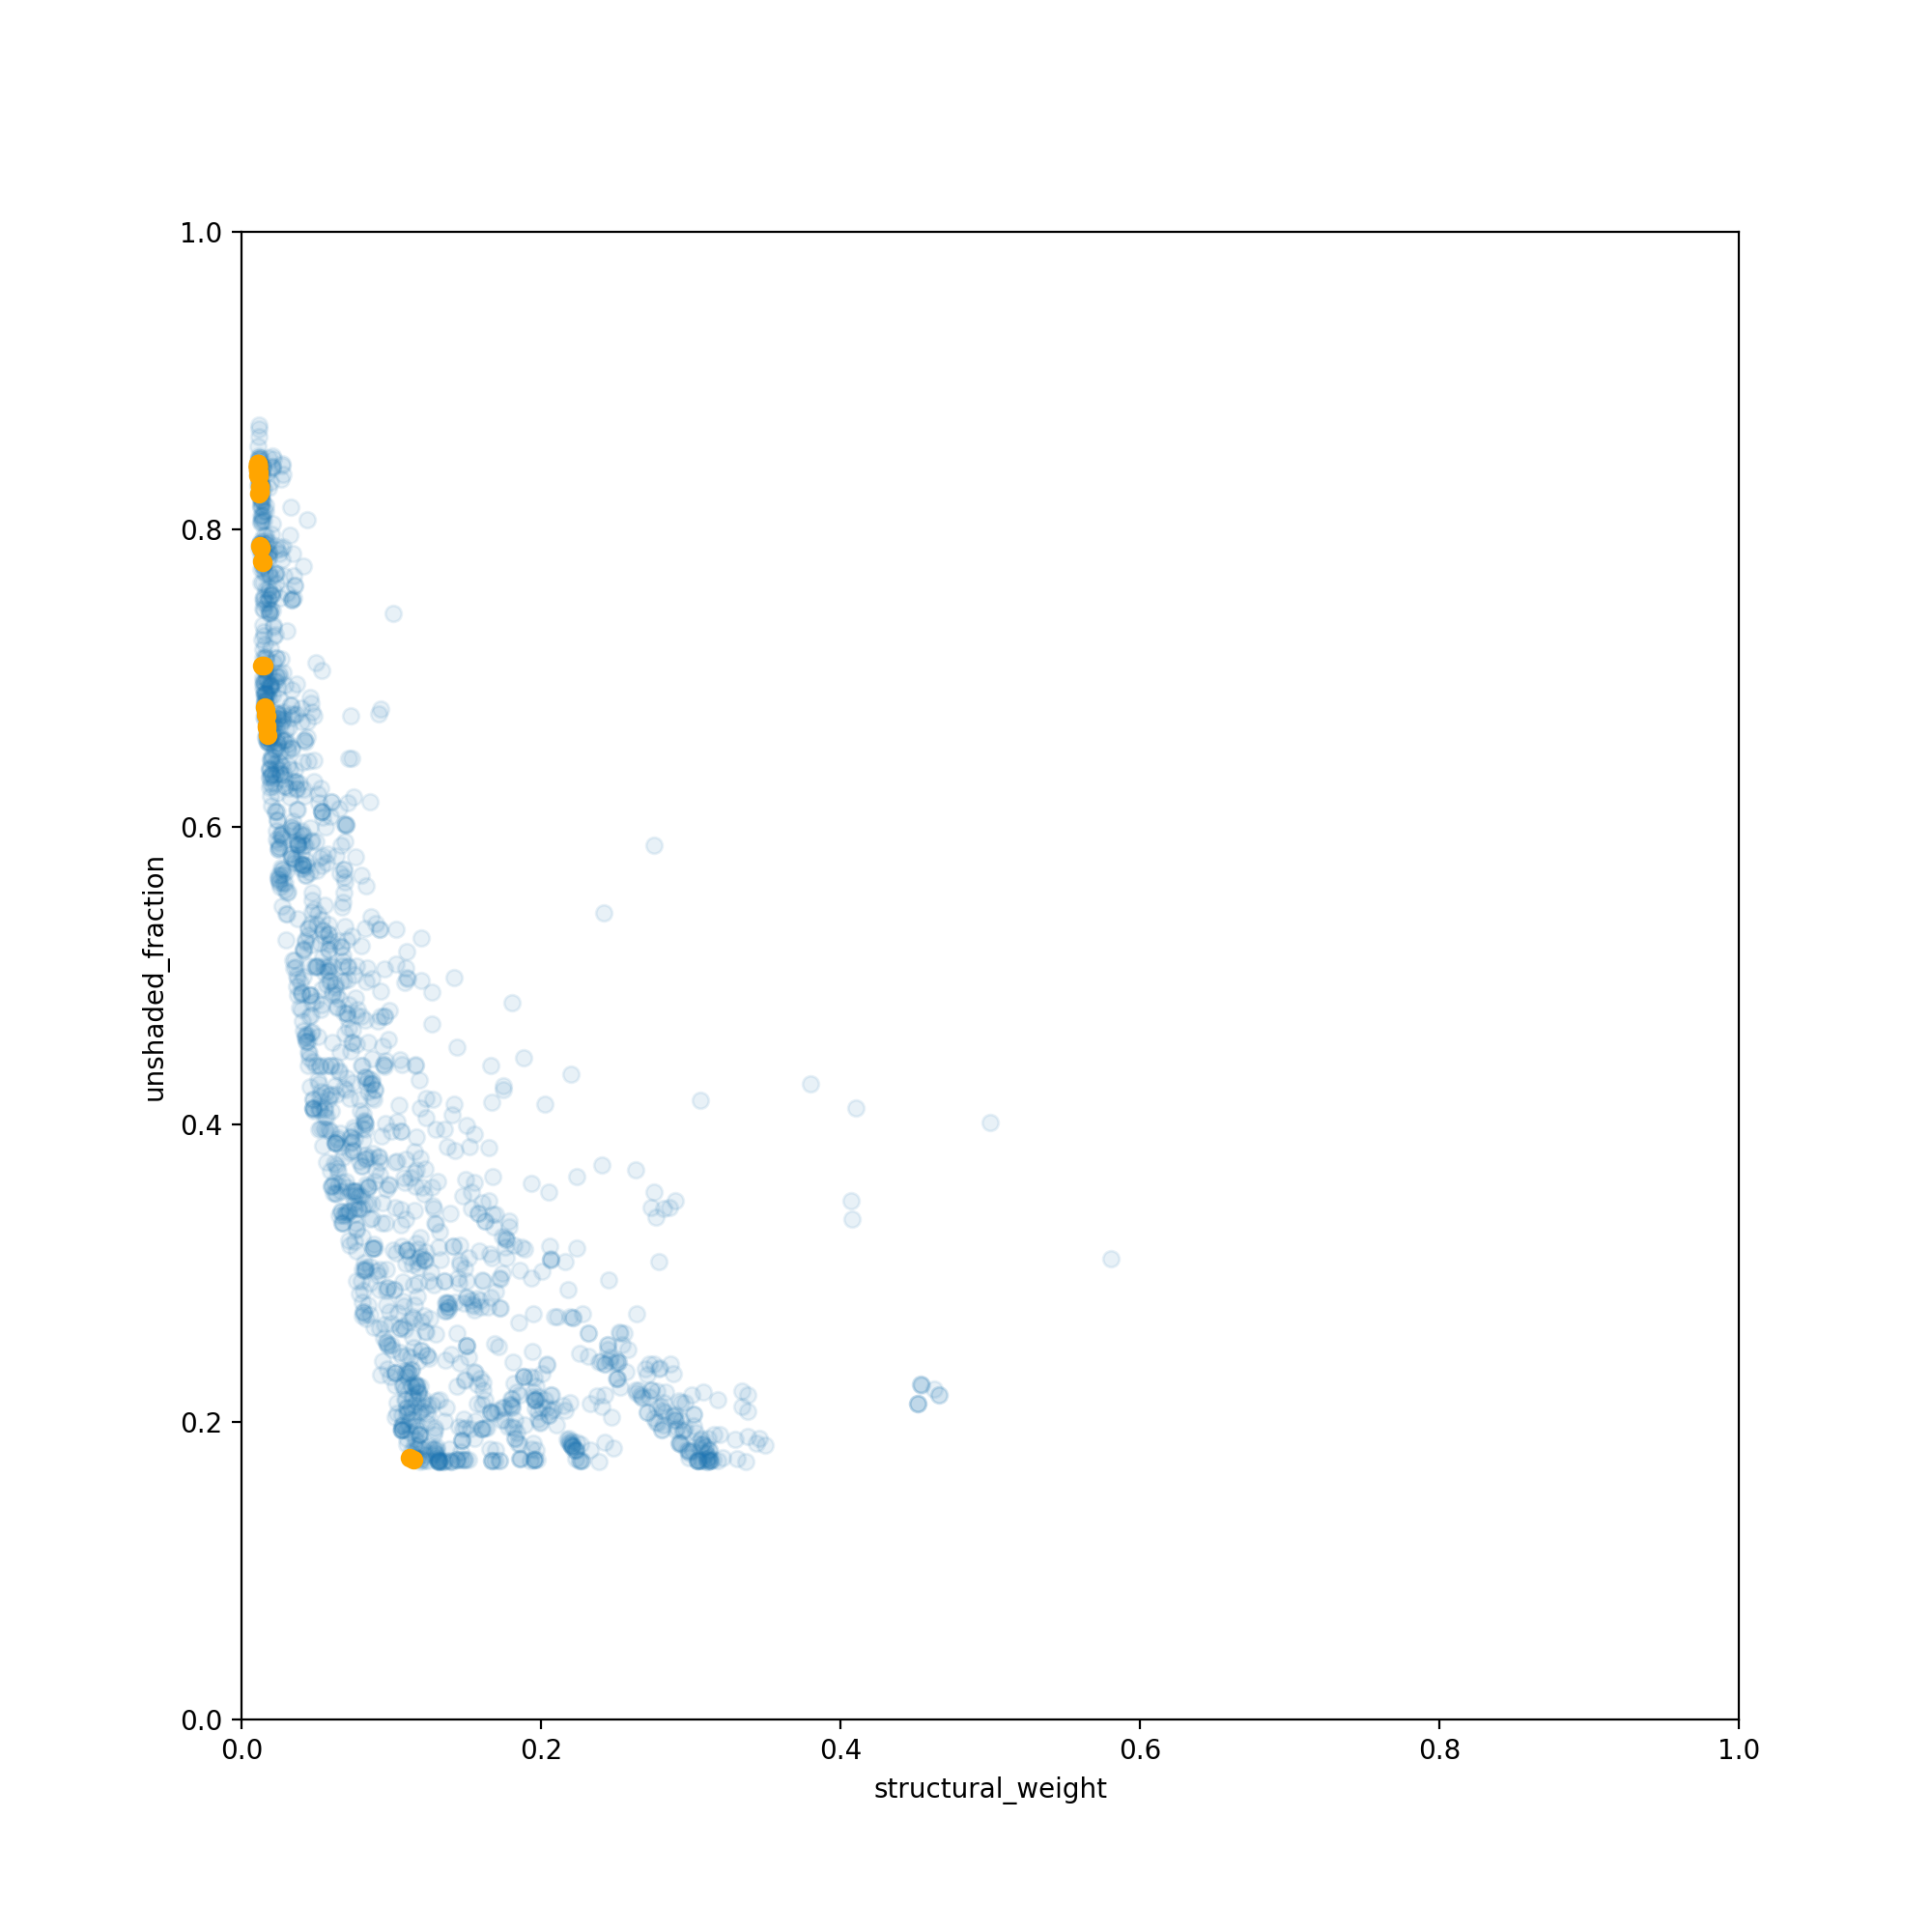

In [186]:
# Plot 2d
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.set_xlabel("structural_weight")
ax.set_ylabel("unshaded_fraction")

ax.scatter(x, y, alpha=.1)
ax.scatter(pareto_xy[:,0], pareto_xy[:,1], color="orange")

ax.set_xlim(0,1.)
ax.set_ylim(0,1.)

plt.savefig(output_folder.joinpath("moo_pareto_xy.png"))

<IPython.core.display.Javascript object>


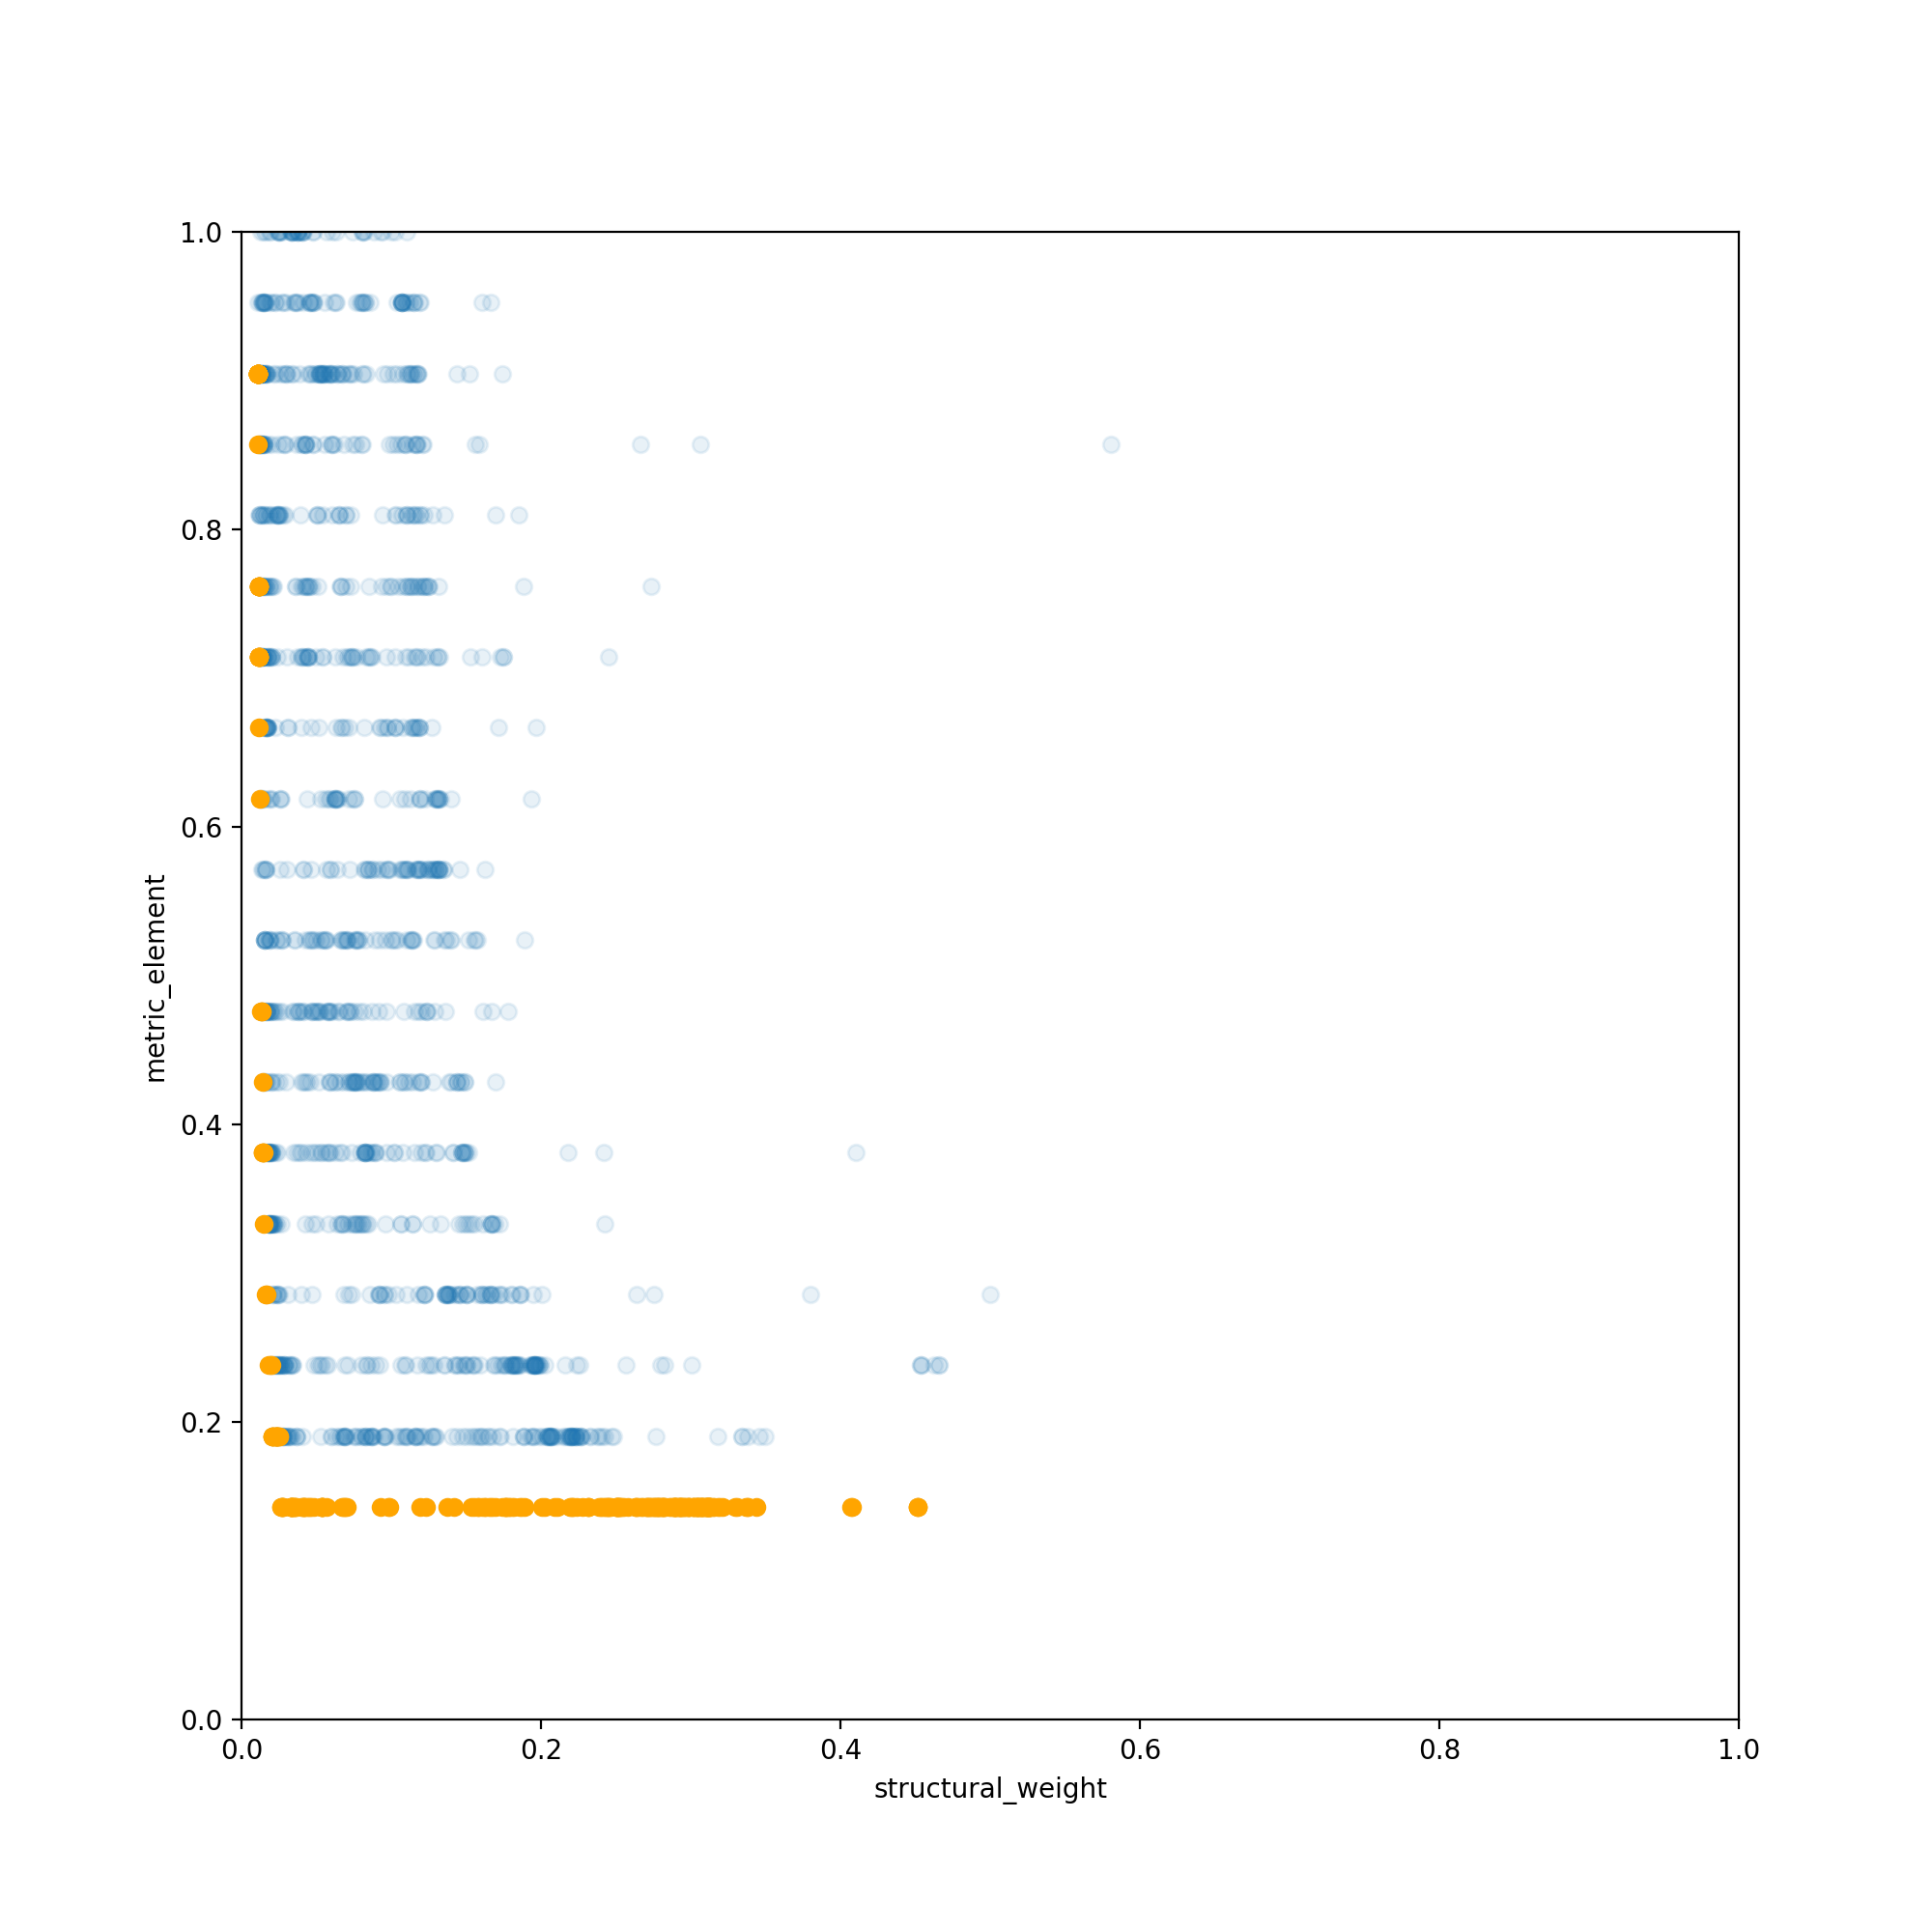

In [169]:
# Plot 2d
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.set_xlabel("structural_weight")
ax.set_ylabel("metric_element")

ax.scatter(x, z, alpha=.1)
ax.scatter(pareto_xz[:,0], pareto_xz[:,1], color="orange")

ax.set_xlim(0,1.)
ax.set_ylim(0,1.)

plt.savefig(output_folder.joinpath("moo_pareto_xz.png"))

<IPython.core.display.Javascript object>


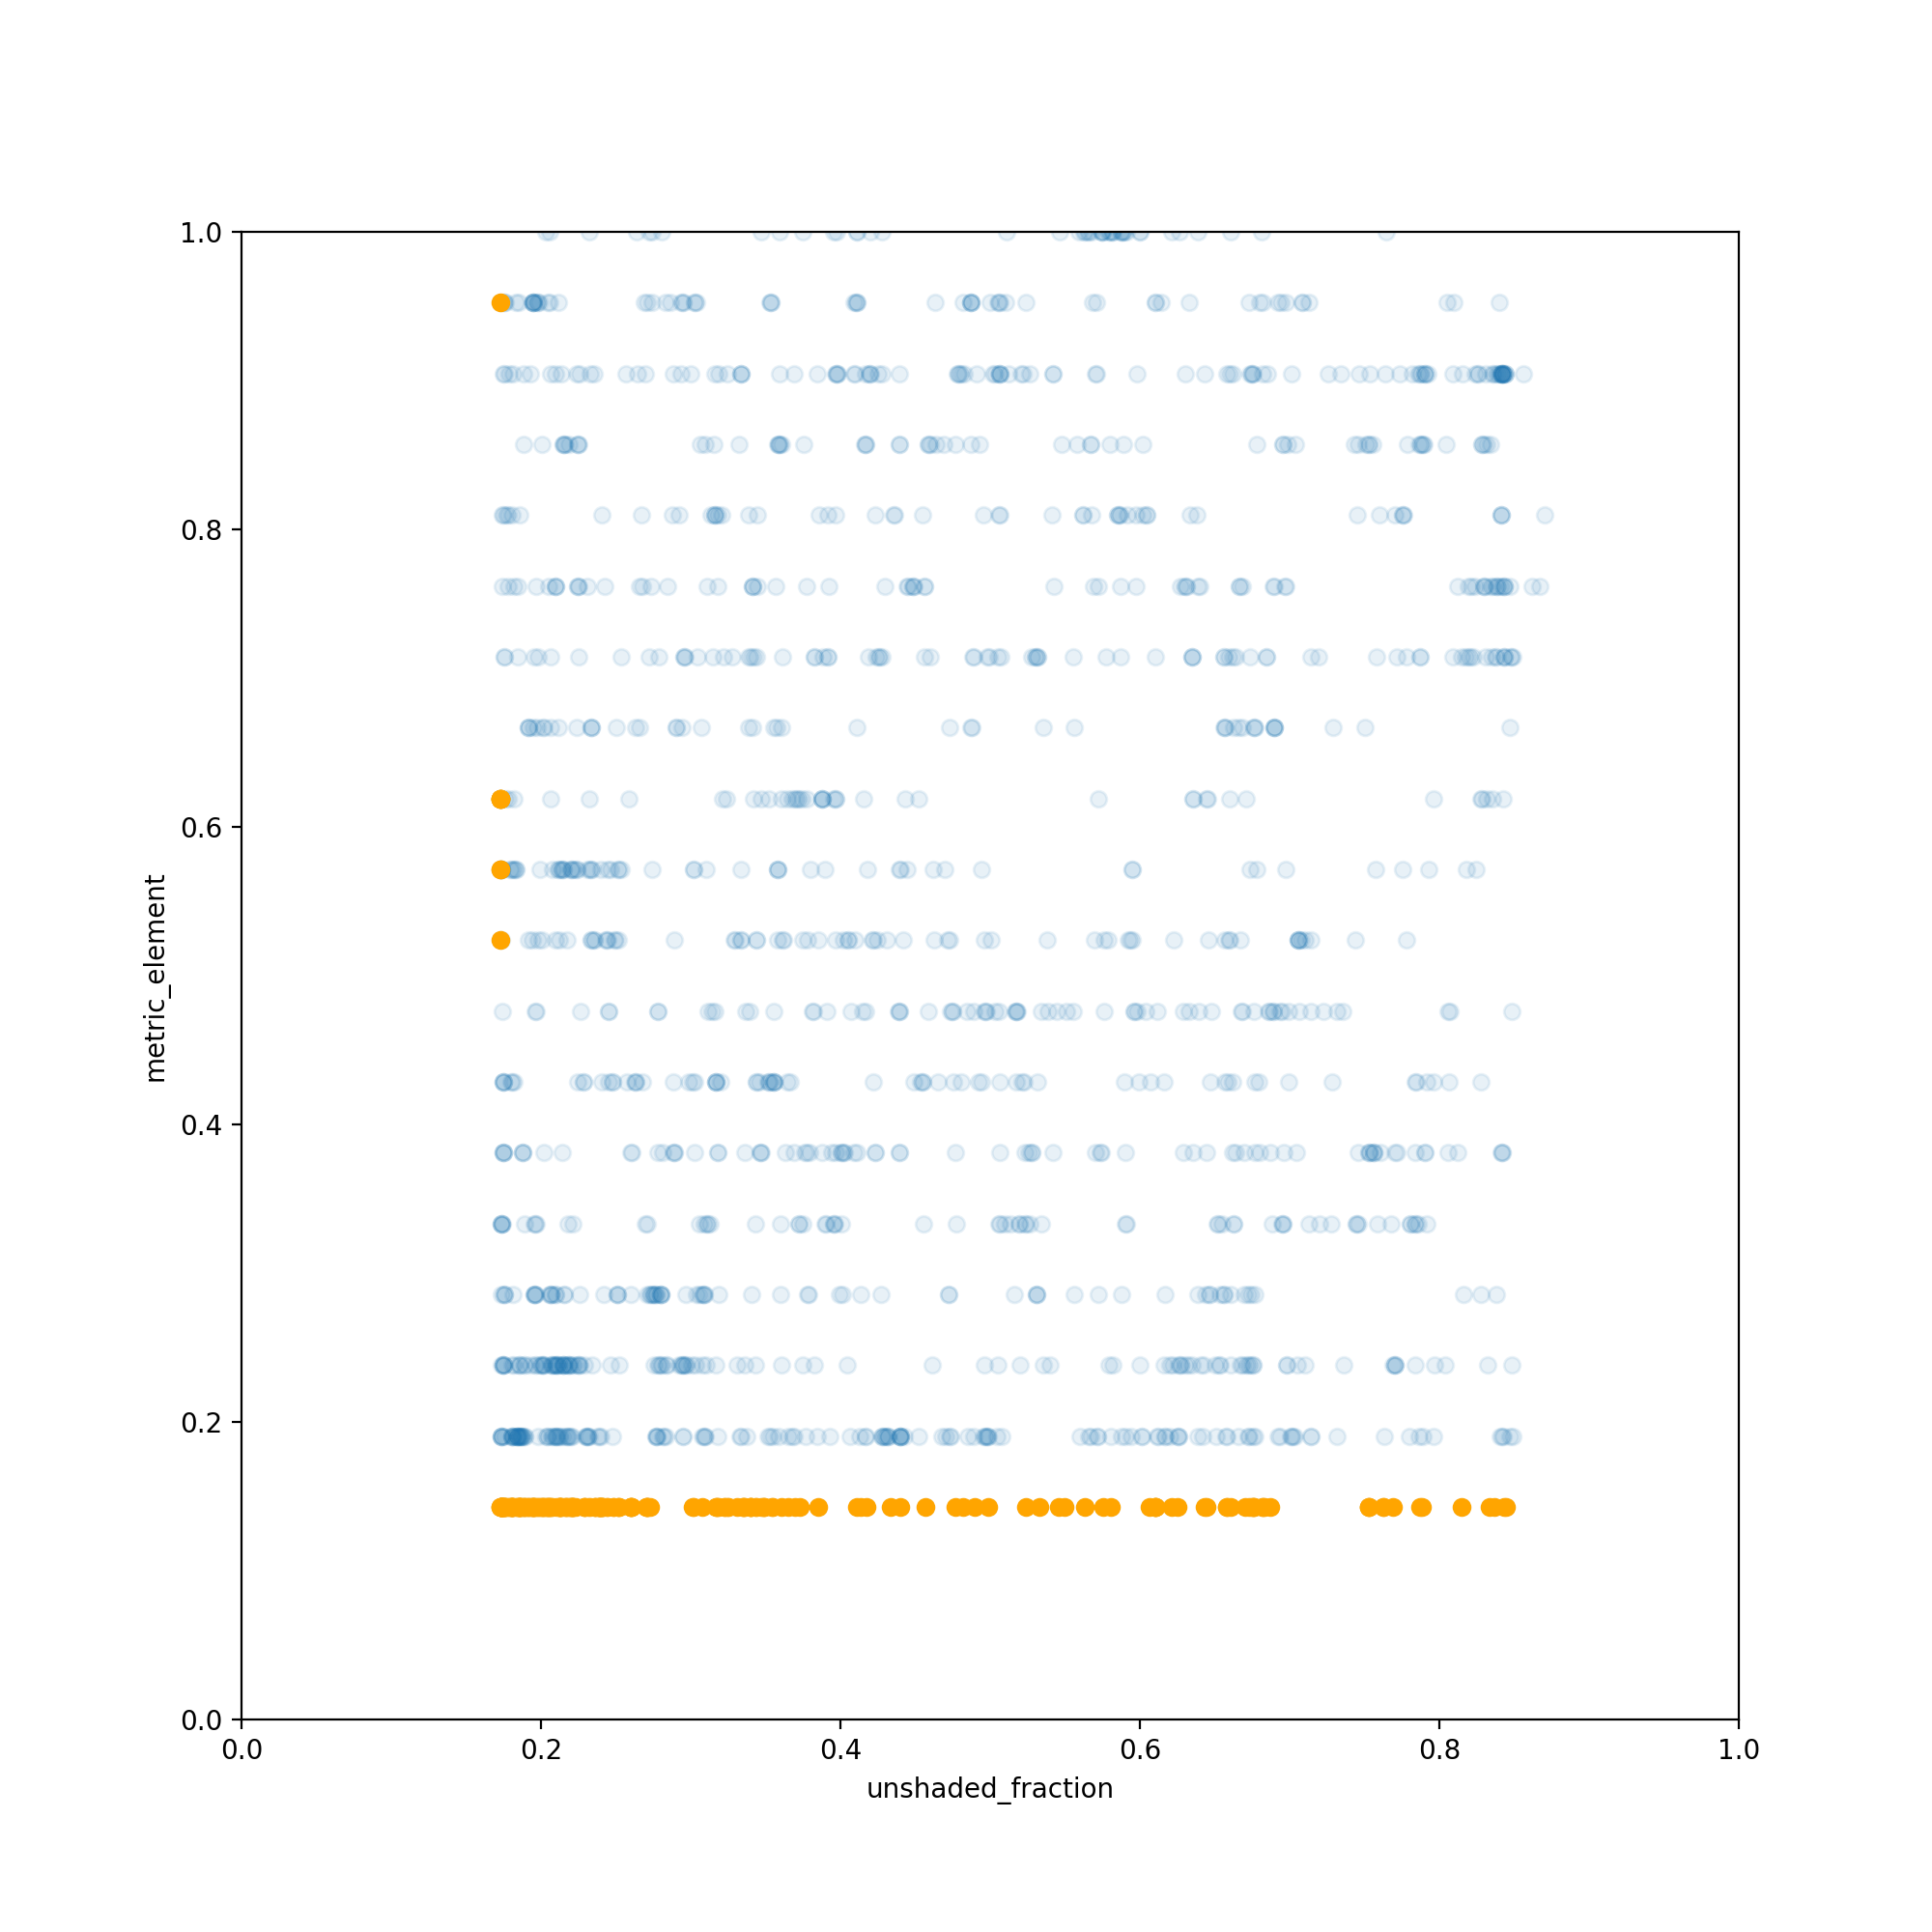

In [170]:
# Plot 2d
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

ax.set_xlabel("unshaded_fraction")
ax.set_ylabel("metric_element")

ax.scatter(y, z, alpha=.1)
ax.scatter(pareto_yz[:,0], pareto_yz[:,1], color="orange")

ax.set_xlim(0,1.)
ax.set_ylim(0,1.)

plt.savefig(output_folder.joinpath("moo_pareto_yz.png"))

<IPython.core.display.Javascript object>


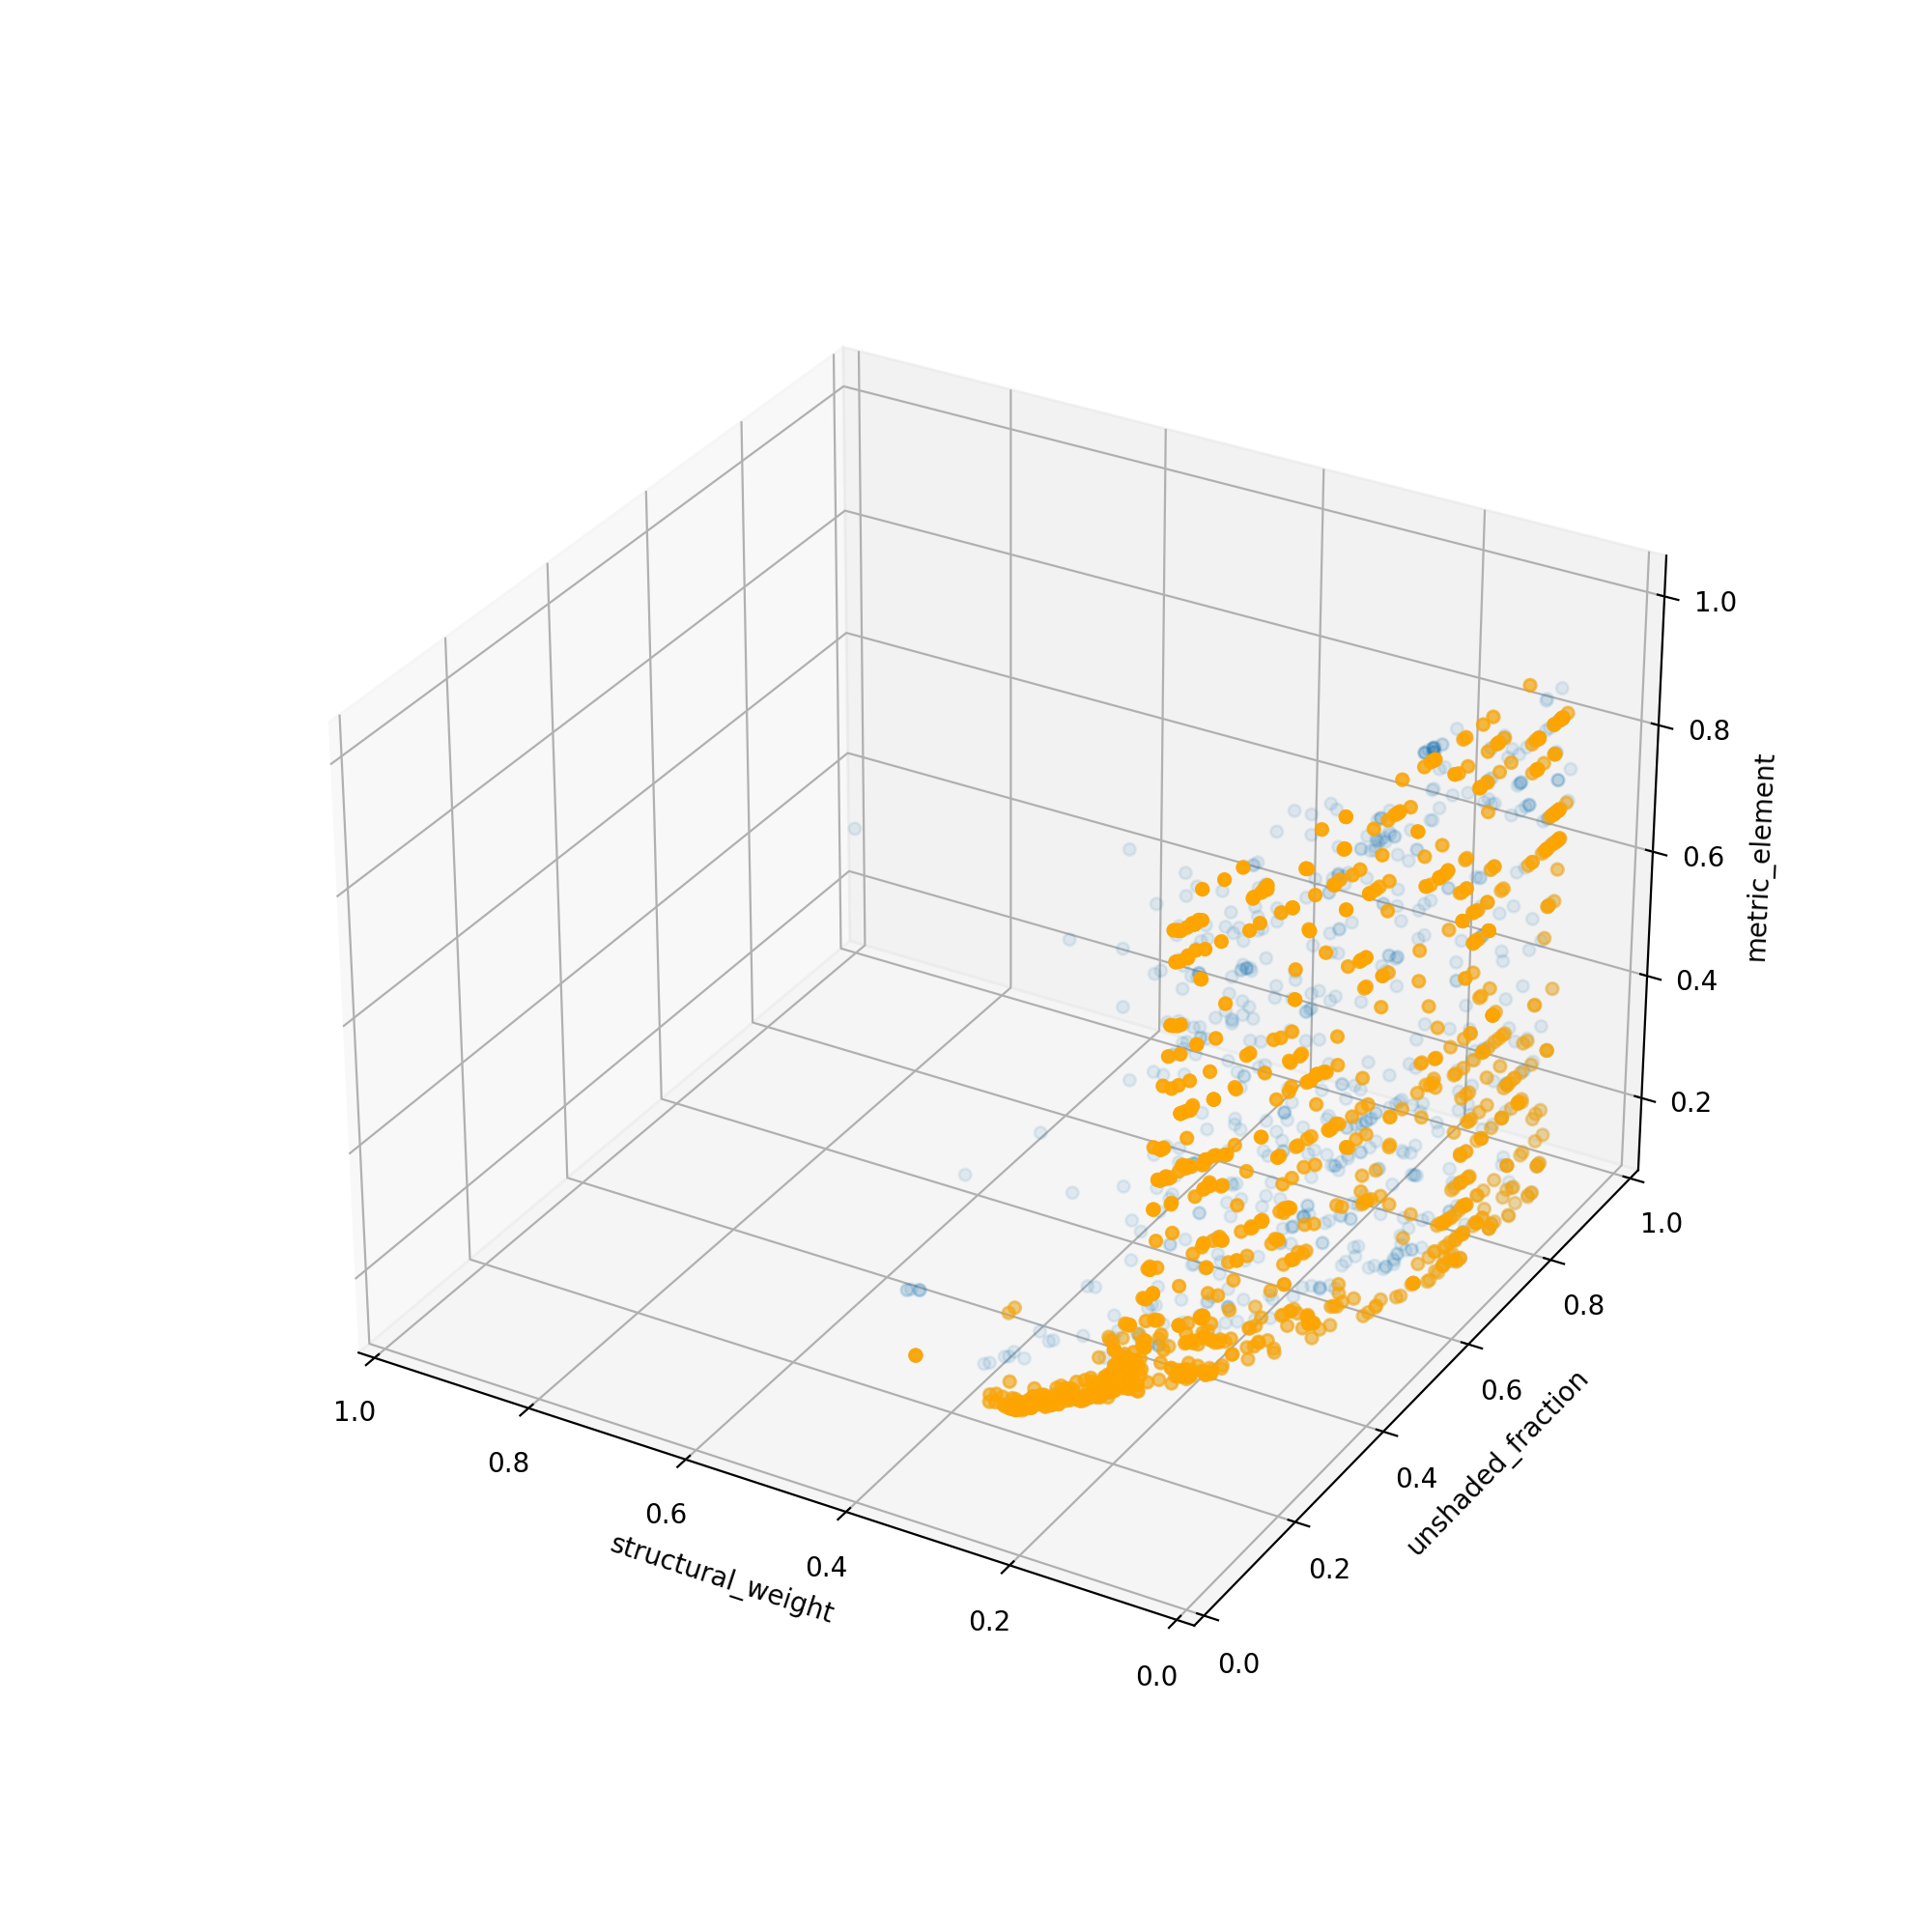

In [121]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = df['metric_structural_weight']
y = df['metric_unshaded_fraction']
z = df['metric_element']

ax.set_xlabel("structural_weight")
ax.set_ylabel("unshaded_fraction")
ax.set_zlabel("metric_element")

ax.scatter(x, y, z, alpha=.1)
ax.scatter(pareto_pts[:,0], pareto_pts[:,1], pareto_pts[:,2], color="orange")

ax.set_xlim(0,1.)
ax.set_ylim(0,1.)

ax.invert_xaxis()

plt.savefig(output_folder.joinpath("moo_objective_pareto.png"))

<IPython.core.display.Javascript object>


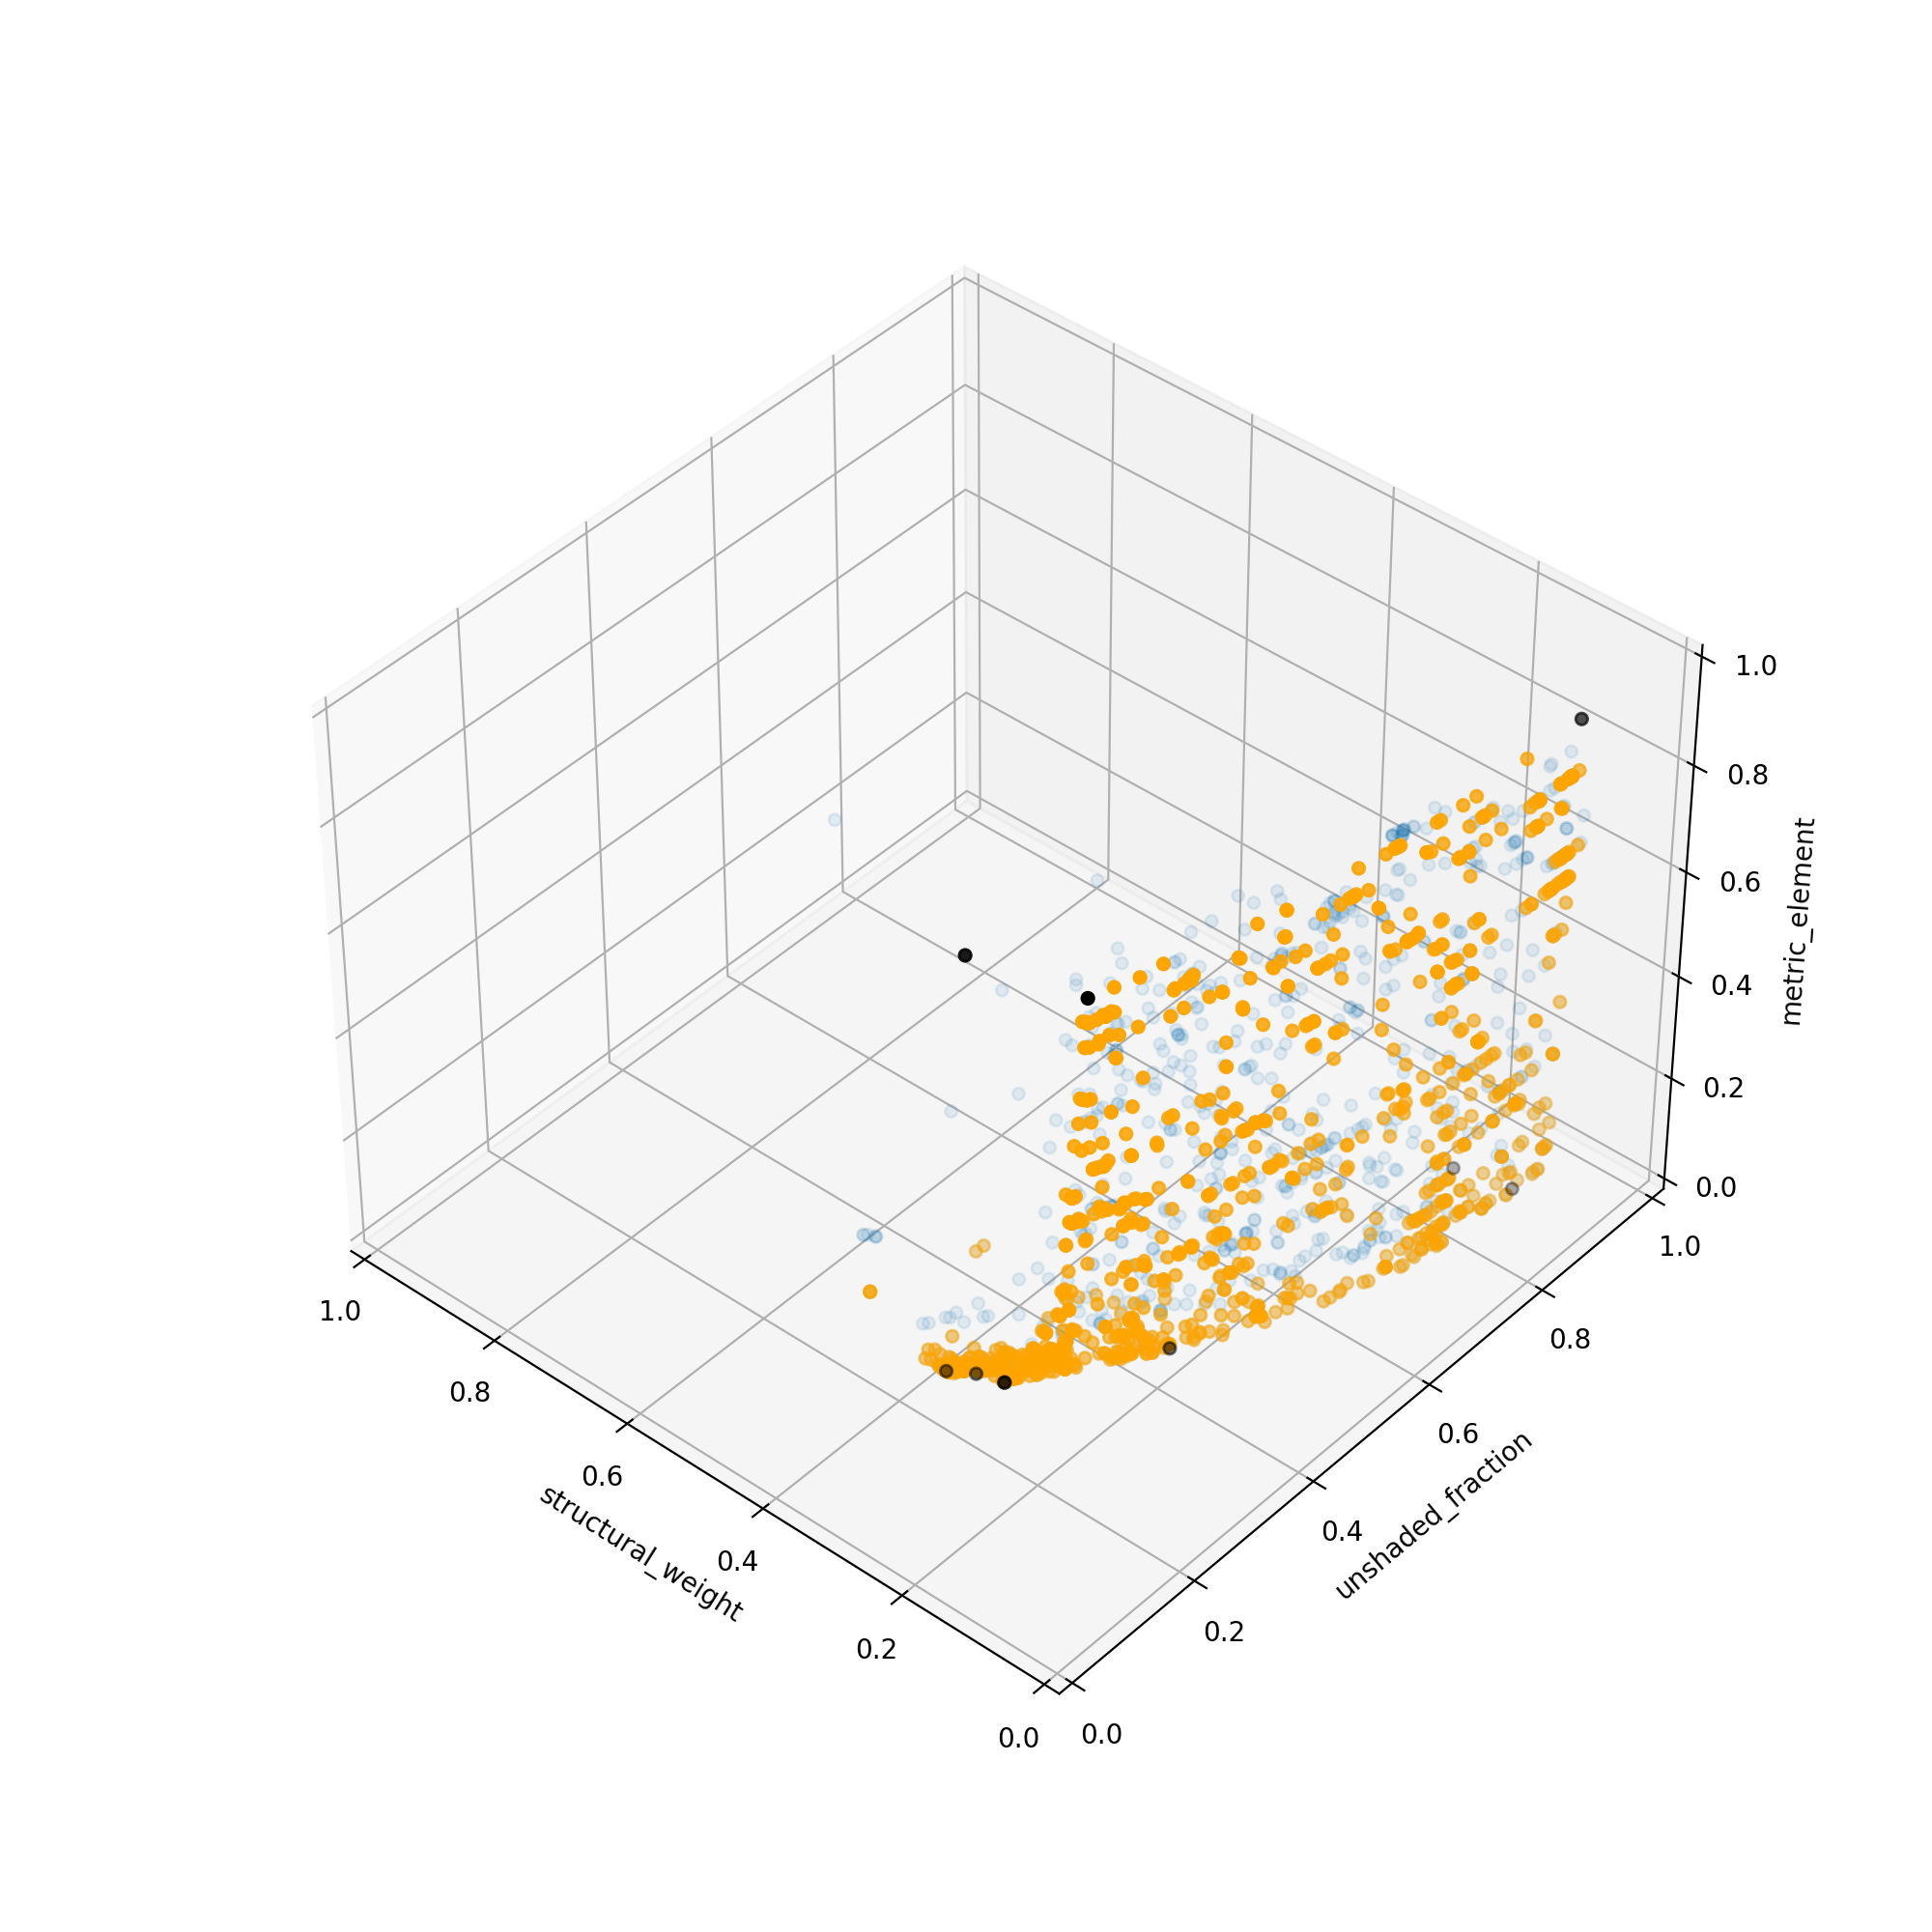

In [122]:
%matplotlib notebook

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection = '3d')

x = df['metric_structural_weight']
y = df['metric_unshaded_fraction']
z = df['metric_element']

ax.set_xlabel("structural_weight")
ax.set_ylabel("unshaded_fraction")
ax.set_zlabel("metric_element")

ax.scatter(x, y, z, alpha=.1)
ax.scatter(pareto_pts[:,0], pareto_pts[:,1], pareto_pts[:,2], color="orange")

ax.scatter(x_m, y_m, z_m, c='k')


ax.set_xlim(0,1.)
ax.set_ylim(0,1.)
ax.set_zlim(0,1.)
ax.invert_xaxis()

plt.savefig(output_folder.joinpath("moo_objective_pareto_with_manual.png"))